In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
df = pd.read_csv('./embeddings_combined.csv')

In [3]:
# Standardize the data before Using PCA to reduce dimensions
from sklearn.preprocessing import StandardScaler

embedding_cols = [str(i) for i in range(1024)]
scaler = StandardScaler()
df[embedding_cols] = scaler.fit_transform(df[embedding_cols].values)

In [4]:
# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

PCA_reducer = PCA(n_components=512)
pca_embeddings = PCA_reducer.fit_transform(df[embedding_cols])

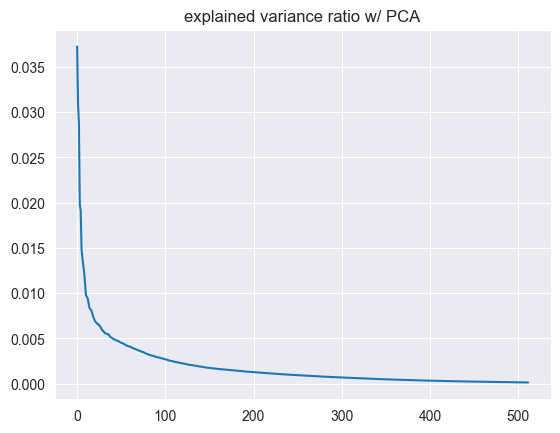

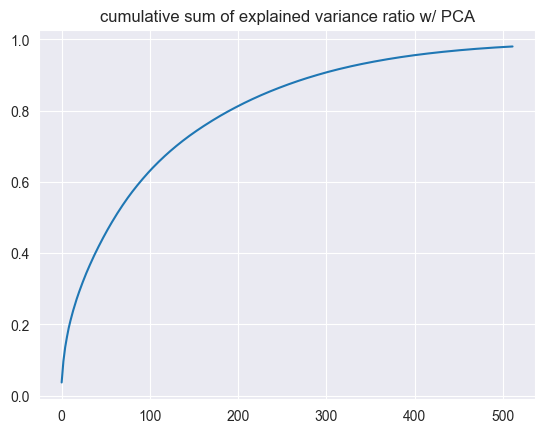

In [6]:
var_ratio = PCA_reducer.explained_variance_ratio_
plt.plot(var_ratio)
plt.title("explained variance ratio w/ PCA")
plt.show()
plt.plot(np.cumsum(var_ratio))
plt.title("cumulative sum of explained variance ratio w/ PCA")
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sector_encoded'] = label_encoder.fit_transform(df['sector'])
num_classes = len(df['sector'].unique())

In [7]:
X = df[embedding_cols].values
# X = pca_embeddings
y = df['sector_encoded'].values

In [8]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Data split into training and test sets.")

print(len(X_test), len( X_train), len(y_test), len(y_train))



Data split into training and test sets.
7615 30457 7615 30457


In [9]:
from sklearn.svm import SVC 
# Placeholders for c and gamma
svm = SVC(kernel='rbf', C=1, gamma=0.01)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [12]:
print(y_pred)
print(y_test)

[8 8 8 ... 8 8 8]
[ 6  7 10 ...  3  6  1]


In [ ]:
# Finding best parameters
best_accuracy = 0
best_parameters = {}

C_values = [10, 100]
gamma_values = [0.1, 1]

# Trying different C and gamma pairs
for c, gamma in zip(C_values, gamma_values):
    cumulative_correct = 0
    
    # Train the model
    svm = SVC(kernel='rbf', C=c, gamma=gamma)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
        
    # Count correct predictions
    for i in range(len(y_pred)):
        if y_pred[i] == y_test[i]:
            cumulative_correct += 1
    
    # Record the best accuracy and parameters
    if cumulative_correct/len(y_train) > best_accuracy:
        best_accuracy = cumulative_correct/len(y_train)
        best_parameters = c, gamma
        
print(best_parameters)
print(best_accuracy)

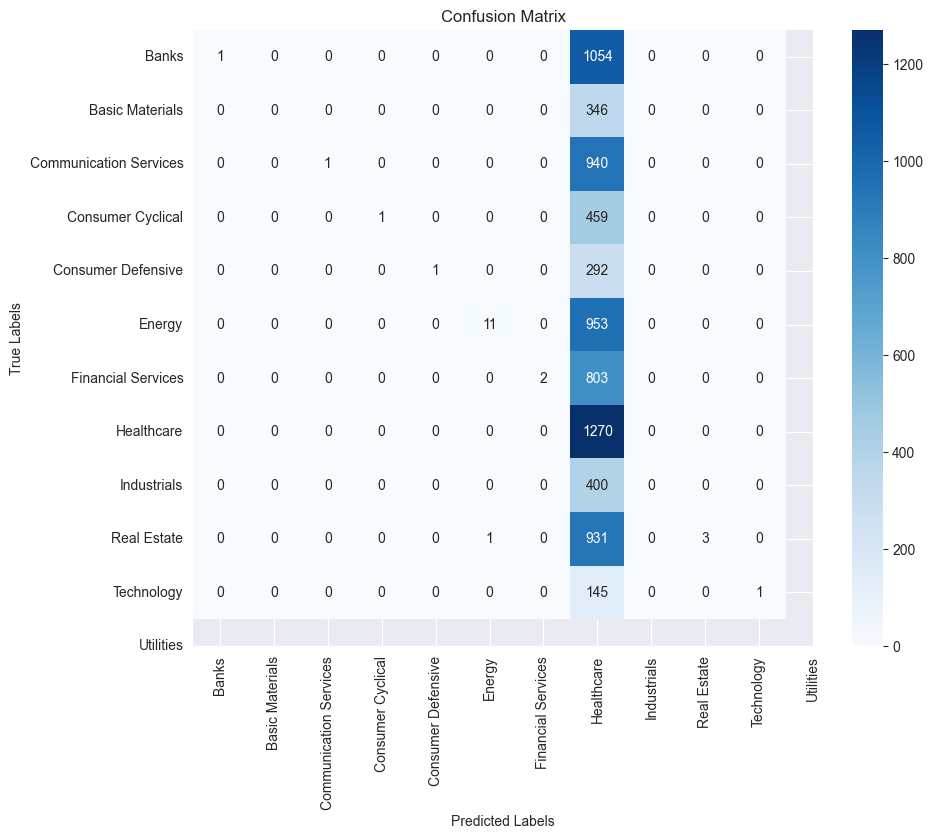

Accuracy: 0.1695
F1 Score: 0.0533


In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Assuming y_test and y_pred are available
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")